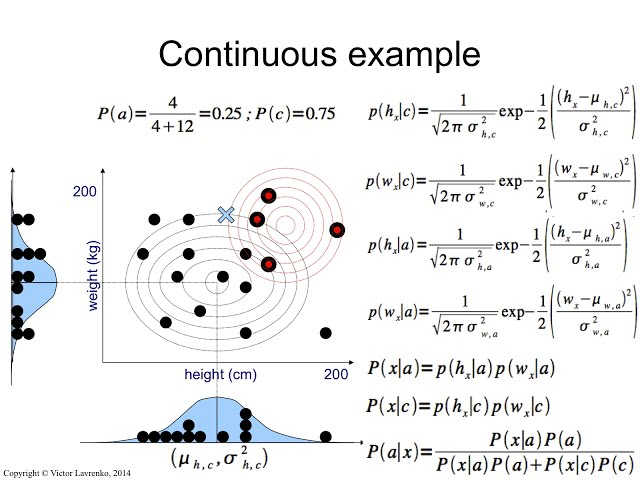

$$ \text{class_prob} = \frac{\text{Total number of samples in that class}}{\text{Total number of samples}}$$

For any text data $X_{test}=(x_1,x_2)$

Use Gaussian Naive Bayes Classifier:

Find the Posterior probability as
$$\underset{c\in C}{\text{argmax} } P(c|x_{test}) = \frac{P(c) p(x_{test}|c)}{P(x_{test})} = prior \times likelihood$$

or, $$\underset{c\in C}{\text{argmax} } P(c|x_{test}) = {P(c) p(x_{test}|c)}$$

If there are two classes $c_1,c_2$ we consider the data generated from two Gaussian distributions having parameters $$(\mu_1,\sigma_1), (\mu_2,\sigma_2)$$

The likelihood is calculated for class $c_1$ as
$$ p(x_{test}|c_1) = p(x_1|c_1) p(x_2|c_1) = \prod_{i\in(1,2)} \frac{1}{\sqrt{2\pi\sigma}}\exp \{ - \frac{(x_i-\mu_1)^2}{2\sigma_1^2}\}$$

Similarly for class $c_2 $ the likelihood will be
$$ p(x_{test}|c_2) = p(x_1|c_2) p(x_2|c_2) = \prod_{i\in(1,2)} \frac{1}{\sqrt{2\pi\sigma}}\exp \{ - \frac{(x_i-\mu_2)^2}{2\sigma_2^2}\}$$


If we use $\log$ - space then

$$ \log p(x_{test}|c_1) = \log\{p(x_1|c_1) p(x_2|c_1)\} = \sum_{i\in(1,2)} \log \frac{1}{\sqrt{2\pi\sigma}}  - \frac{(x_i-\mu_1)^2}{2\sigma_1^2}$$

$$ \log p(x_{test}|c_2) = \log\{p(x_1|c_2) p(x_2|c_2)\} = \sum_{i\in(1,2)} \log \frac{1}{\sqrt{2\pi\sigma}}  - \frac{(x_i-\mu_2)^2}{2\sigma_2^2}$$

Predictions will be made as

$$\text{argmax}(P(c_1|x_{test}),P(c_2|x_{test}))$$


[0 1]
2
{0: 0.5555555555555556, 1: 0.4444444444444444}
{0: [(4.4, 3.0724582991474434), (8.2, 2.2271057451320084)], 1: [(5.75, 1.479019945774904), (4.5, 3.2015621187164243)]}
(4.4, 3.0724582991474434)
(0, 1)
(1, 20)
(2, 30)
1
20
30
[-9.88486154 -8.63727528]
[1]


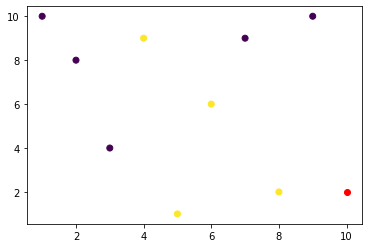

In [3]:
import numpy as np
import matplotlib.pyplot as plt

X = np.array([[1, 2, 3, 4, 5, 6, 7, 8, 9],
              [10, 8, 4, 9, 1, 6, 9, 2, 10]]).T
y = np.array([0, 0, 0, 1, 1, 1, 0, 1, 0])


Test_data = np.array([[10],[2]]).T
# Plot train data according to their class labels
plt.scatter(X[:,0],X[:,1],c=y)
# Plot test data with red colour
plt.scatter(Test_data[:,0],Test_data[:,1],c='r')

# Find no. of samples and features in train data
m,n = X.shape# n = number of features, m = # num of samples
classes = np.unique(y)# find the unique classes
print(classes)
n_classes = len(classes) # find the total number of classes
print(n_classes)

# Initialize dictionaries to store class-wise statistics
class_probs = {}
mean_std = {}

# Calculate class probabilities
## Find the class_probs for each class depending on the number of samples present
for c in classes:
    class_probs[c] = len(y[y==c])/m
print(class_probs)

# Calculate mean and standard deviation for each feature in each class
for c in classes:
    X_c = X[y == c]
    mean_std[c] = [(X_c[:, i].mean(), X_c[:, i].std()) for i in range(n)]

print(mean_std)
print(mean_std[0][0])

# mean, std = mean_std[c][j] #  mean of jth feature of c th class, std of jth feature of c th class

C=[1,20,30]
for k in enumerate(C):
  print(k)

for k,l in enumerate(C): # k represents index, l represents the corresponding value
  print(l)


predictions =[]

for x in Test_data:
  class_scores = np.zeros(n_classes)

  for i,c in enumerate(classes):
    class_scores[i] = np.log(class_probs[c]) ## log-Prior probability
    for j in range(n):# no of features
    # Hint : # mean, std = mean_std[c][j] #  mean of jth feature of c th class, std of jth feature of c th class
        mean, std = mean_std[c][j]  # extract each feature from each class

        feature = x[j]
        # Hint -(feature-mean)^2/(std^2)
        exponent = -((x[j]-mean)**2)/(2*std**2)
        # Hint : log(1/(2pi sigma)^2) + the exponent term
        class_scores[i] += np.log(1/(np.sqrt(2 *np.pi )*std)) + exponent# log prior + log likelihood

  predicted_class = classes[np.argmax(class_scores)]
  predictions.append(predicted_class)

print(class_scores)
print(predictions)

Predictions: [1]


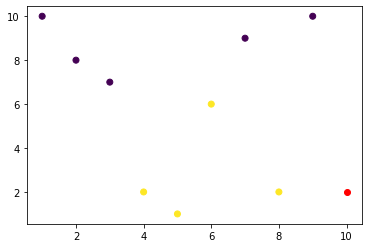

In [4]:
import numpy as np

## Training Gaussian Naive Bayes is to find the mean and standard deviation of the given data (supervised)
## So we know how many classes are there

def train_NB(X,y):
  m,n = X.shape
  classes = np.unique(y)
  n_classes = len(classes)

  class_prob = {}
  mean_std = {}
  # Calculate class probabilities
  for c in classes:
      class_probs[c] =len(y[y==c])/m 

  # Calculate mean and standard deviation for each feature in each class
  for c in classes:
      X_c = X[y == c]
      mean_std[c] = [(X_c[:, i].mean(), X_c[:, i].std()) for i in range(n)]

  return class_probs, mean_std


# Function to predict using the Naive Bayes model
def predict_naive_bayes(X, class_probs, mean_std):
    n_samples, n_features = X.shape
    classes = list(class_probs.keys())
    n_classes = len(classes)
    predictions = []

    for x in X:
        class_scores = np.zeros(n_classes)

        for i, c in enumerate(classes):
            class_scores[i] = np.log(class_probs[c])

            for j in range(n_features):
                mean, std = mean_std[c][j]
                exponent = -((x[j]-mean)**2)/(2*std**2)
                class_scores[i] += np.log(1/(np.sqrt(2 *np.pi )*std)) + exponent

        predicted_class = classes[np.argmax(class_scores)]
        predictions.append(predicted_class)

    return predictions

X = np.array([[1, 2, 3, 4, 5, 6, 7, 8, 9],
              [10, 8, 7, 2, 1, 6, 9, 2, 10]]).T
y = np.array([0, 0, 0, 1, 1, 1, 0, 1, 0])



plt.scatter(X[:,0],X[:,1],c=y)
plt.scatter(Test_data[:,0],Test_data[:,1],c='r')

# Fit the Naive Bayes model
class_probs, mean_std = train_NB(X,y)

# Predict on new data
Test_data = np.array([[10],[2]]).T
predictions = predict_naive_bayes(Test_data, class_probs, mean_std)

print("Predictions:", predictions)


In [5]:
from sklearn.datasets import make_blobs
K=6
spread=2
RS=10
X,y=make_blobs(n_samples=K*50,centers=K,cluster_std=spread,random_state=RS)
Class_probs,mean_std=train_NB(X,y)

(76659, 1)


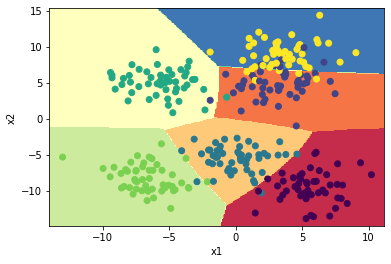

In [6]:
# Plotting Decision Boundary
 # Set min and max values and give it some padding
x_min, x_max = X[:,0].min() -1 , X[:,0].max() + 1
y_min, y_max = X[:,1].min() -1, X[:,1].max() + 1
h = 0.1
#print(X)
# Generate a grid of points with distance h between them
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
# Predict the function value for the whole grid

Xn = (np.c_[xx.ravel(),yy.ravel()])

P = predict_naive_bayes(Xn, class_probs, mean_std)
P = np.array(P).reshape(-1,1)
print(P.shape)
P = P.reshape(xx.shape)

plt.contourf(xx, yy, P, cmap=plt.cm.Spectral)
plt.ylabel('x2')
plt.xlabel('x1')
plt.scatter(X[:,0], X[:,1], c = y)